# DATA EXPLORATION,DATA PREPROCCSSING

In [65]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
# for Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,\
explained_variance_score, max_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


In [66]:
df1=pd.read_csv(r"C:\Users\salma elbadry\Desktop\Projects\project_ML\autos.csv")
df=df1.copy()
print(df1.shape)

(371539, 19)


In [67]:
df1.duplicated().sum()


69

In [68]:
 df1.drop_duplicates()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,3/24/2016 0:00,70435,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,3/24/2016 0:00,66954,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,3/14/2016 0:00,90480,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,3/17/2016 0:00,91074,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,3/31/2016 0:00,60437,4/6/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371534,3/14/2016 17:48,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,3/14/2016 0:00,39576,4/6/2016 0:46
371535,3/5/2016 19:56,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,3/5/2016 0:00,26135,3/11/2016 18:17
371536,3/19/2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,3/19/2016 0:00,87439,4/7/2016 7:15
371537,3/20/2016 19:41,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,3/20/2016 0:00,40764,3/24/2016 12:45


In [69]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371539 entries, 0 to 371538
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371539 non-null  object
 1   name                 371539 non-null  object
 2   seller               371538 non-null  object
 3   offerType            371538 non-null  object
 4   price                371538 non-null  object
 5   abtest               371538 non-null  object
 6   vehicleType          333669 non-null  object
 7   yearOfRegistration   371538 non-null  object
 8   gearbox              351329 non-null  object
 9   powerPS              371538 non-null  object
 10  model                351053 non-null  object
 11  kilometer            371538 non-null  object
 12  monthOfRegistration  371538 non-null  object
 13  fuelType             338152 non-null  object
 14  brand                371537 non-null  object
 15  notRepairedDamage    299478 non-nu

In [70]:
import missingno as msno

<AxesSubplot: >

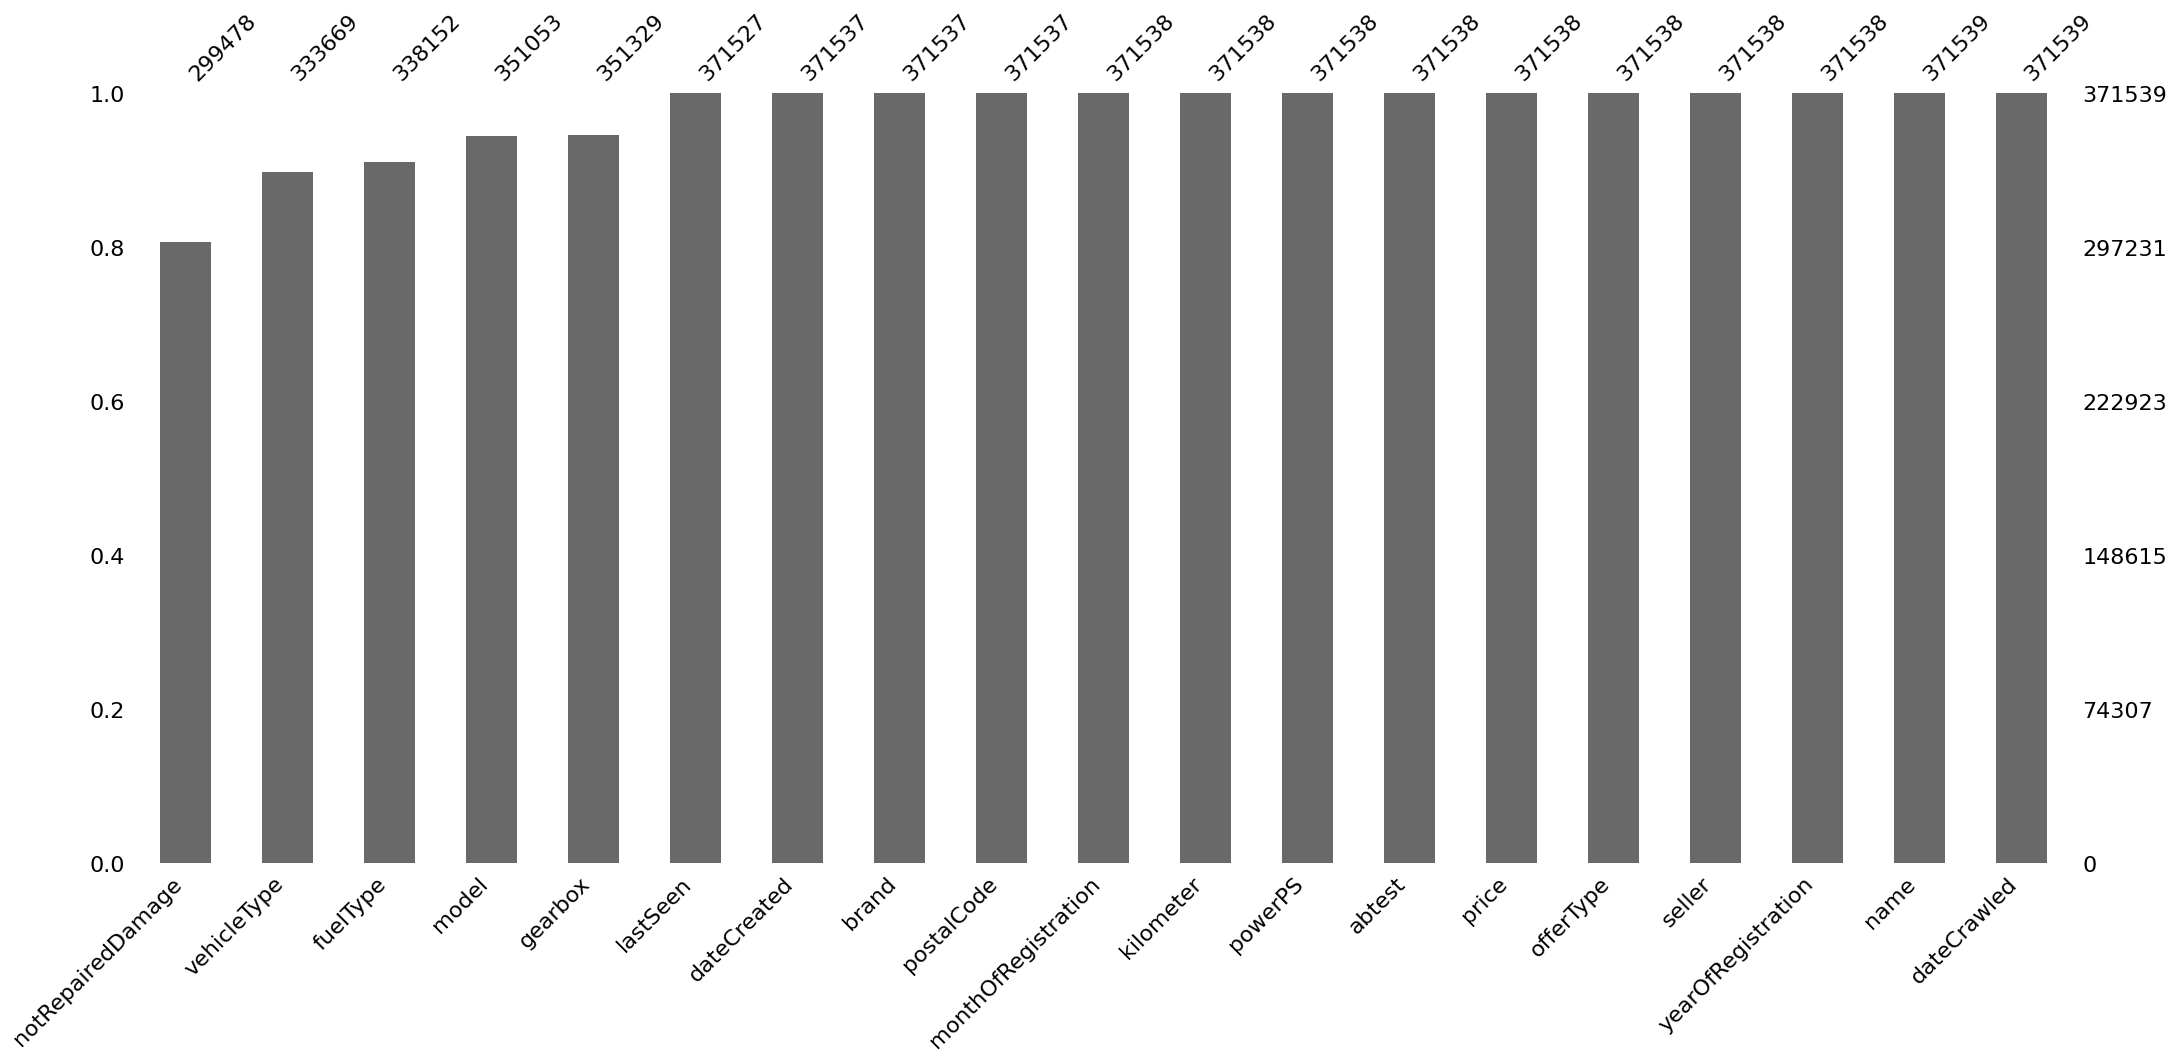

In [71]:
msno.bar(df1, sort='ascending')

<AxesSubplot: title={'center': 'Test Type'}>

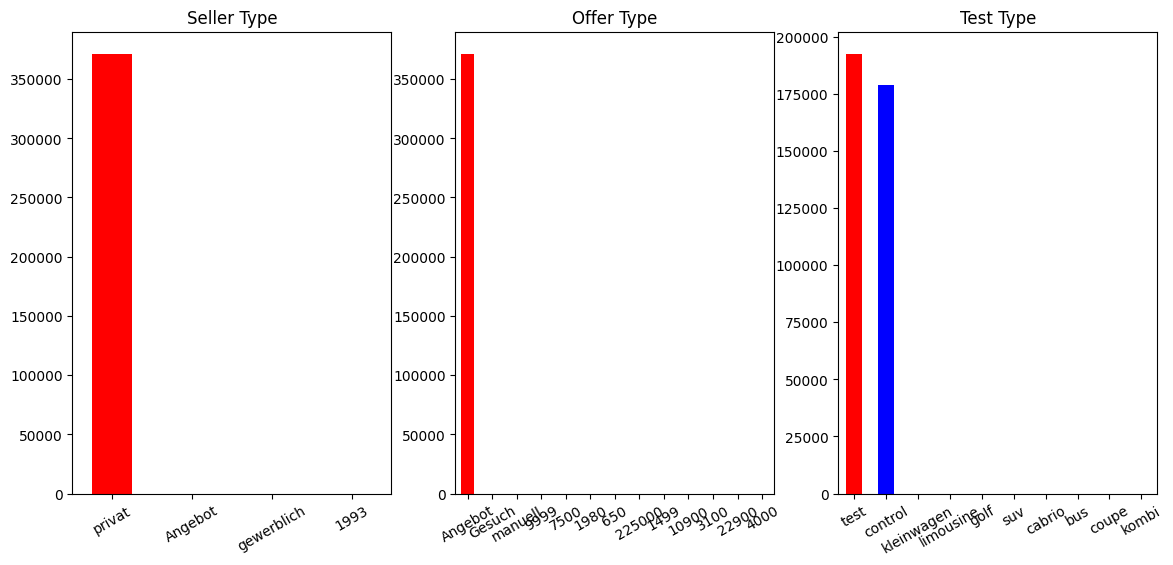

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

df1['seller'].value_counts().plot(kind='bar', title='Seller Type',  color=['red', 'blue'], ax=axes[0], rot=30, xlabel='')

df1['offerType'].value_counts().plot(kind='bar', title='Offer Type',  color=['red', 'blue'], ax=axes[1], rot=30, xlabel='')

df1['abtest'].value_counts().plot(kind='bar', title='Test Type',  color=['red', 'blue'], ax=axes[2], rot=30, xlabel='')

# Data Preprocessing - Part 1

#### I think later I'm gonna have to do more data preprocessing.
#### Since except for 3 rows all the other ads are private, I'm also gonna drop the seller column. It's basically useless.
#### As shown, the offerTyple column is also useless so I'm gonna drop this one, too.
#### Also, I noticed that the yearOfRegistration column has some odd and extreme values. So, I'm gonna define a solid range for this field. I think a range between 1980 and 2023 is decent.
#### German to English:
#### manuell --> Manual
#### automatik --> Automatic
#### ja --> Yes
#### nein --> No
#### benzin --> Petrol
#### andere --> Other

In [73]:
import pandas as pd
import numpy as np

# Assuming df1 is your DataFrame

# Check if the columns exist before dropping
columns_to_drop = ['lastSeen', 'dateCrawled']
existing_columns = set(df1.columns)
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the specified columns
df1.drop(columns=columns_to_drop, inplace=True)

# Replace problematic values with NaN in 'dateCreated' column
df1.loc[df1['dateCreated'] == '0', 'dateCreated'] = pd.NaT

# Convert 'dateCreated' to datetime format
df1['dateCreated'] = pd.to_datetime(df1['dateCreated'], errors='coerce')

# Convert 'yearOfRegistration' to numeric
df1['yearOfRegistration'] = pd.to_numeric(df1['yearOfRegistration'], errors='coerce')

# Define a range for the 'yearOfRegistration'
df1 = df1[df1['yearOfRegistration'].between(1980, 2023, inclusive=False)]

# German to English conversion
df1['gearbox'] = df1['gearbox'].apply(lambda g: 'Manual' if g == 'manuell' else 'Automatic')
df1['notRepairedDamage'] = df1['notRepairedDamage'].apply(lambda g: 'Yes' if g == 'ja' else 'No' if g =='nein' else 'NaN')
df1.loc[df1['fuelType'] == 'benzin', 'fuelType'] = 'Petrol'
df1.loc[df1['fuelType'] == 'andere', 'fuelType'] = 'Other'

df1.head()


,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993.0,Manual,0,golf,150000,0,Petrol,volkswagen,NaN,2016-03-24,70435
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011.0,Manual,190,NaN,125000,5,diesel,audi,Yes,2016-03-24,66954
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004.0,Automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001.0,Manual,75,golf,150000,6,Petrol,volkswagen,No,2016-03-17,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008.0,Manual,69,fabia,90000,7,diesel,skoda,No,2016-03-31,60437


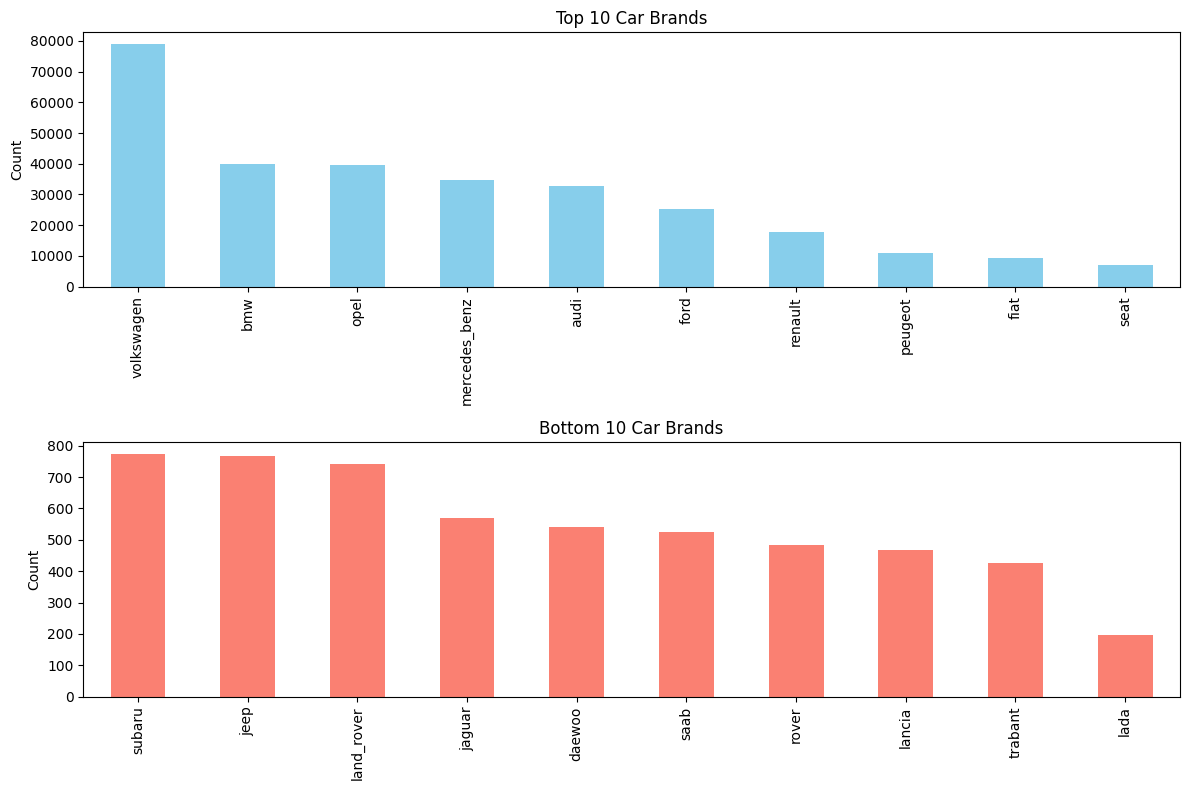

In [74]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame

# Top 10 brands
top_brands = df1['brand'].value_counts().head(10)

# Bottom 10 brands
bottom_brands = df1['brand'].value_counts().tail(10)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Top 10 brands bar plot
top_brands.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Car Brands')
axes[0].set_ylabel('Count')

# Bottom 10 brands bar plot
bottom_brands.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Bottom 10 Car Brands')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


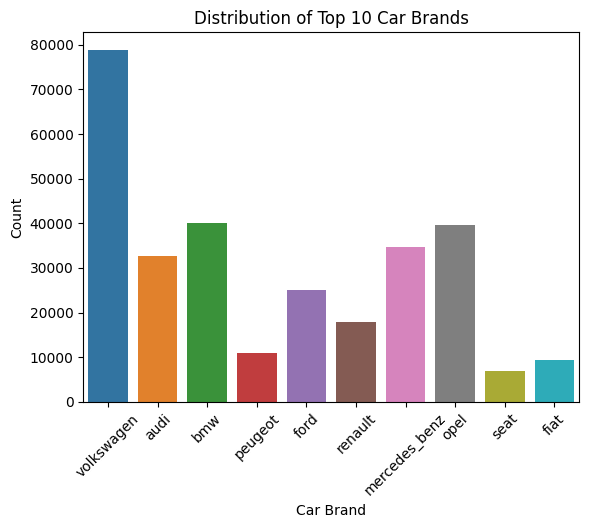

In [75]:
# Get the top 10 car brands
top_brands = df1['brand'].value_counts().head(10).index

# Filter the DataFrame for the top 10 brands
df_top_brands = df1[df1['brand'].isin(top_brands)]

# Plot the count plot
sns.countplot(data=df_top_brands, x="brand")
plt.title("Distribution of Top 10 Car Brands")
plt.xlabel("Car Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


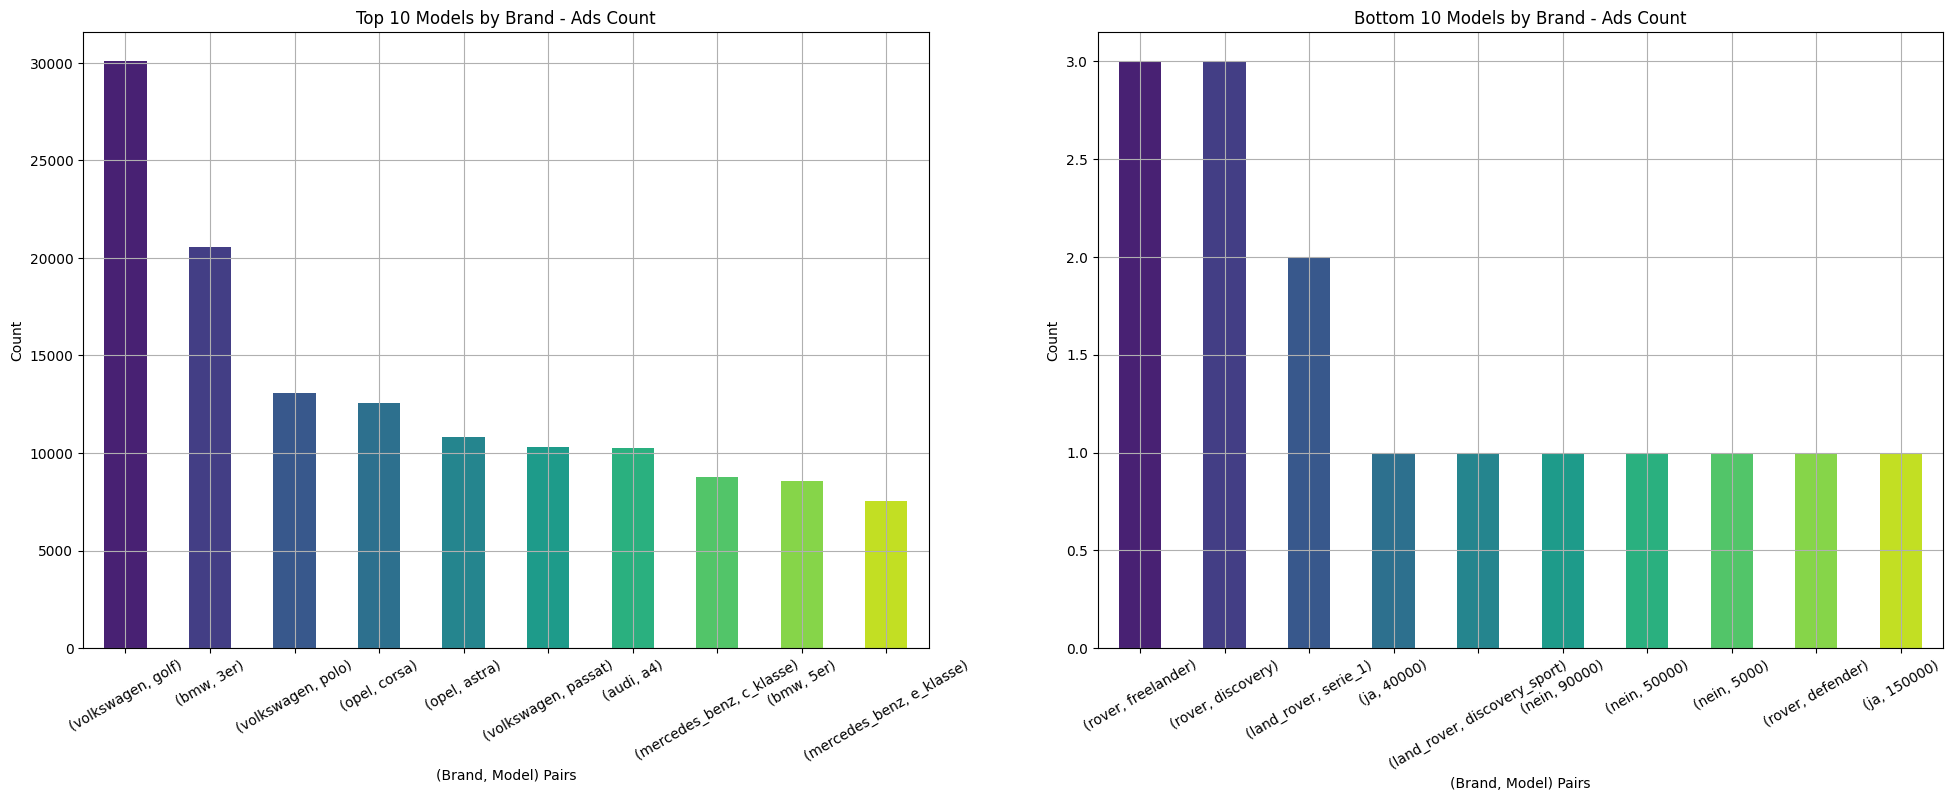

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'brand' and 'model' columns

# Count the occurrences of each model within each brand
group_by_brand = df.groupby(['brand', 'model']).size().sort_values(ascending=False)

# Get the top and bottom 10 models by brand
top_10_models = group_by_brand.head(10)
bottom_10_models = group_by_brand.tail(10)

# Set up the colors for the plots
colors_10_2 = sns.color_palette('viridis', 10)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Top 10 models by brand bar plot
top_10_models.plot(kind='bar', grid=True, rot=30, xlabel="(Brand, Model) Pairs", ylabel='Count', title='Top 10 Models by Brand - Ads Count', ax=axes[0], color=colors_10_2)

# Bottom 10 models by brand bar plot
bottom_10_models.plot(kind='bar', grid=True, rot=30, xlabel="(Brand, Model) Pairs", ylabel='Count', title='Bottom 10 Models by Brand - Ads Count', ax=axes[1], color=colors_10_2)

plt.show()


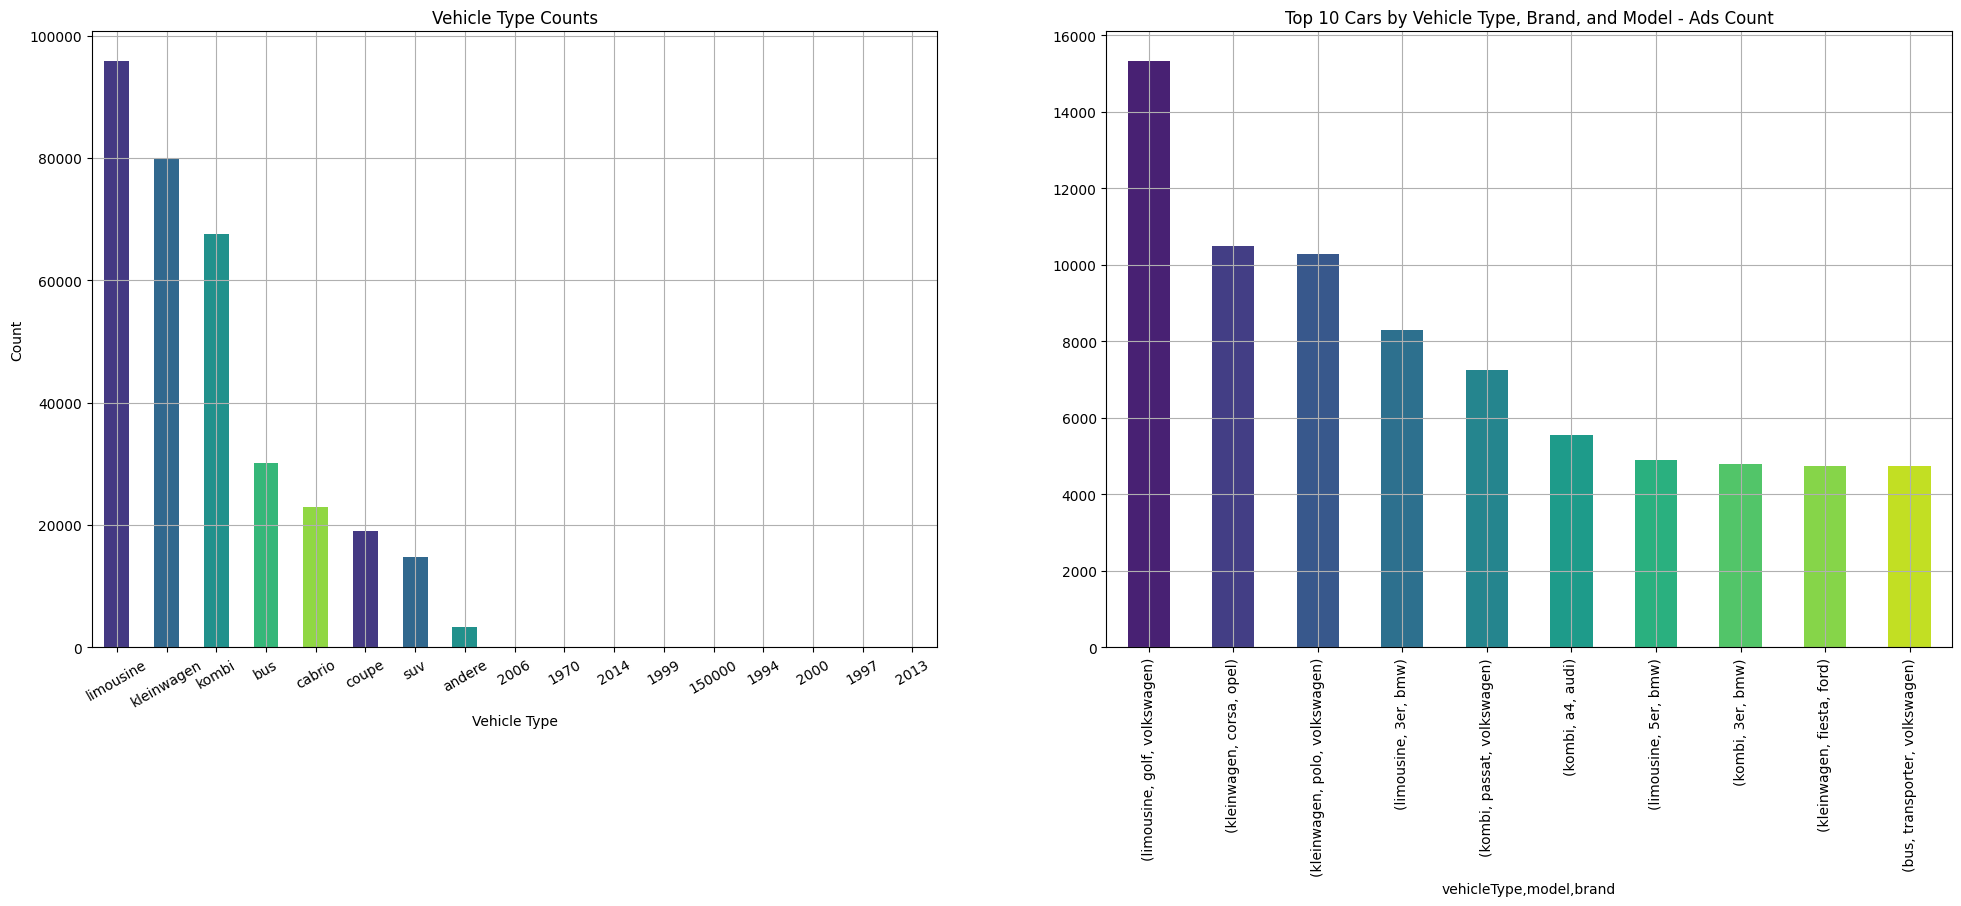

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'vehicleType', 'model', and 'brand' columns

# Count the occurrences of each vehicle type, brand, and model
group_by_vehicle_type = df.groupby(['vehicleType', 'model', 'brand']).size().sort_values(ascending=False)

# Get the top 10 combinations of vehicle type, brand, and model
top_10_combinations = group_by_vehicle_type.head(10)

# Set up the colors for the plots
colors_5 = sns.color_palette('viridis', 5)
colors_10_1 = sns.color_palette('viridis', 10)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Bar plot for vehicle type counts
df['vehicleType'].value_counts().plot(kind='bar', color=colors_5, ax=axes[0], grid=True, rot=30, xlabel='Vehicle Type', ylabel='Count', title='Vehicle Type Counts')

# Top 10 combinations of vehicle type, brand, and model bar plot
top_10_combinations.plot(kind='bar', grid=True, color=colors_10_1, ax=axes[1], title='Top 10 Cars by Vehicle Type, Brand, and Model - Ads Count')

plt.show()


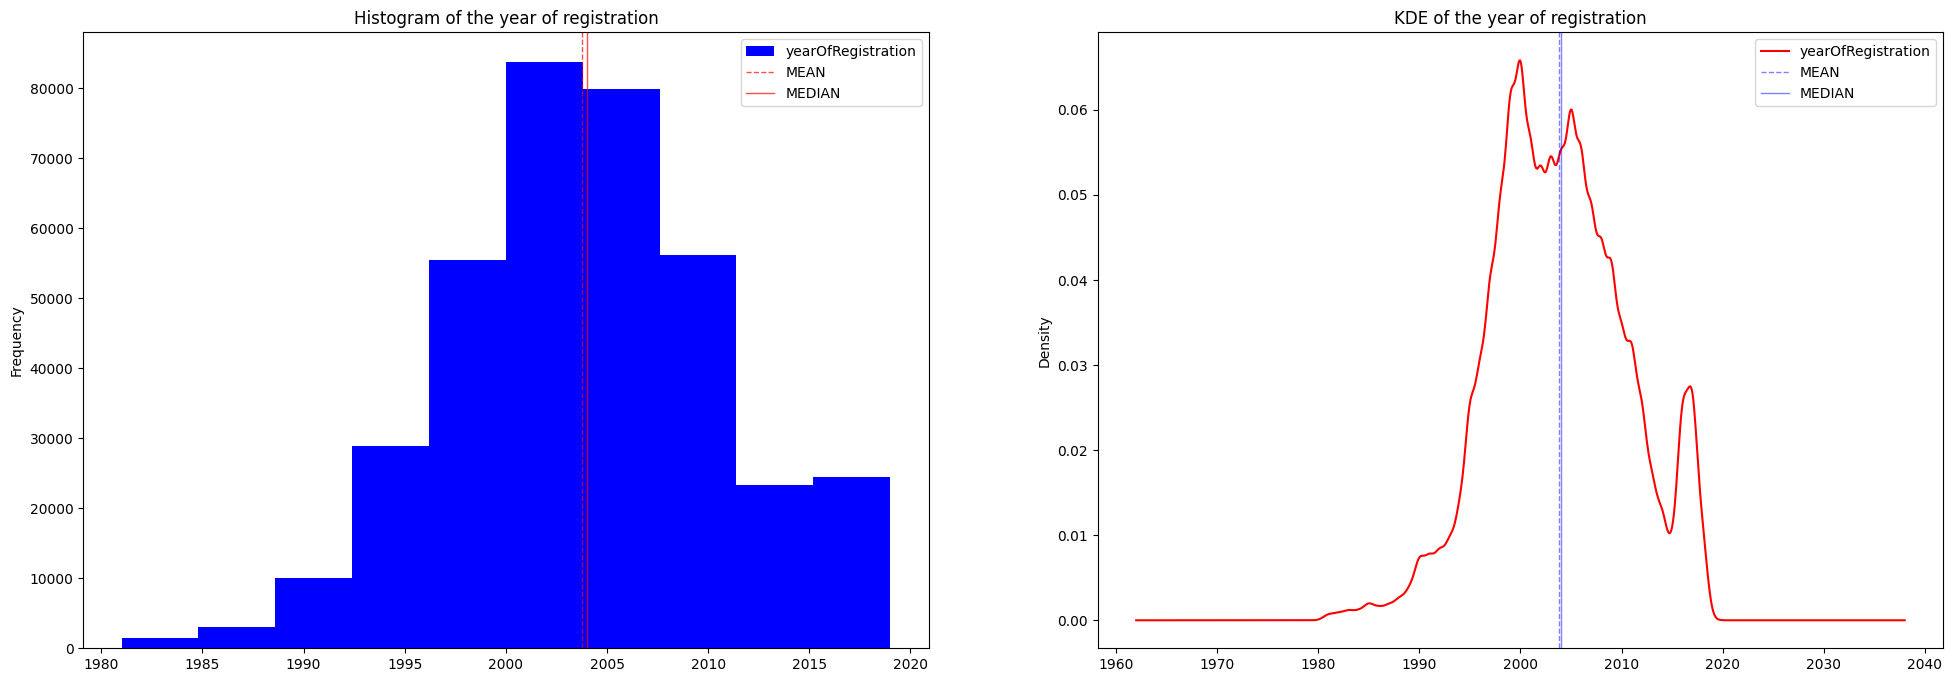

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'yearOfRegistration' column

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
df1['yearOfRegistration'] = pd.to_numeric(df1['yearOfRegistration'], errors='coerce')

# Calculate mean and median of the 'yearOfRegistration'
yr_mean = df1['yearOfRegistration'].mean()
yr_median = df1['yearOfRegistration'].median()

# Plot a histogram with 10 bins
df1['yearOfRegistration'].plot(kind='hist', bins=10, ax=axes[0], title='Histogram of the year of registration', xlabel='Year', color='blue')

# Add vertical lines for mean and median on the histogram plot
axes[0].axvline(yr_mean, color='red', linestyle='dashed', linewidth=1, label='MEAN', alpha=.7)
axes[0].axvline(yr_median, color='red', linestyle='solid', linewidth=1, label='MEDIAN', alpha=.7)

# Add legend to the histogram plot
axes[0].legend()

# Plot a kernel density estimate (KDE) plot ()
df1['yearOfRegistration'].plot(kind='kde', ax=axes[1], title='KDE of the year of registration', xlabel='Year',  color='red')

# Add vertical lines for mean and median on the KDE plot
axes[1].axvline(yr_mean, color='blue', linestyle='dashed', linewidth=1, label='MEAN', alpha=.5)
axes[1].axvline(yr_median, color='blue', linestyle='solid', linewidth=1, label='MEDIAN', alpha=.5)

# Add legend to the KDE plot
axes[1].legend()

# Display the plots
plt.show()


Min. of Kilometer: 5000 -- Max. of Kilometer: 150000



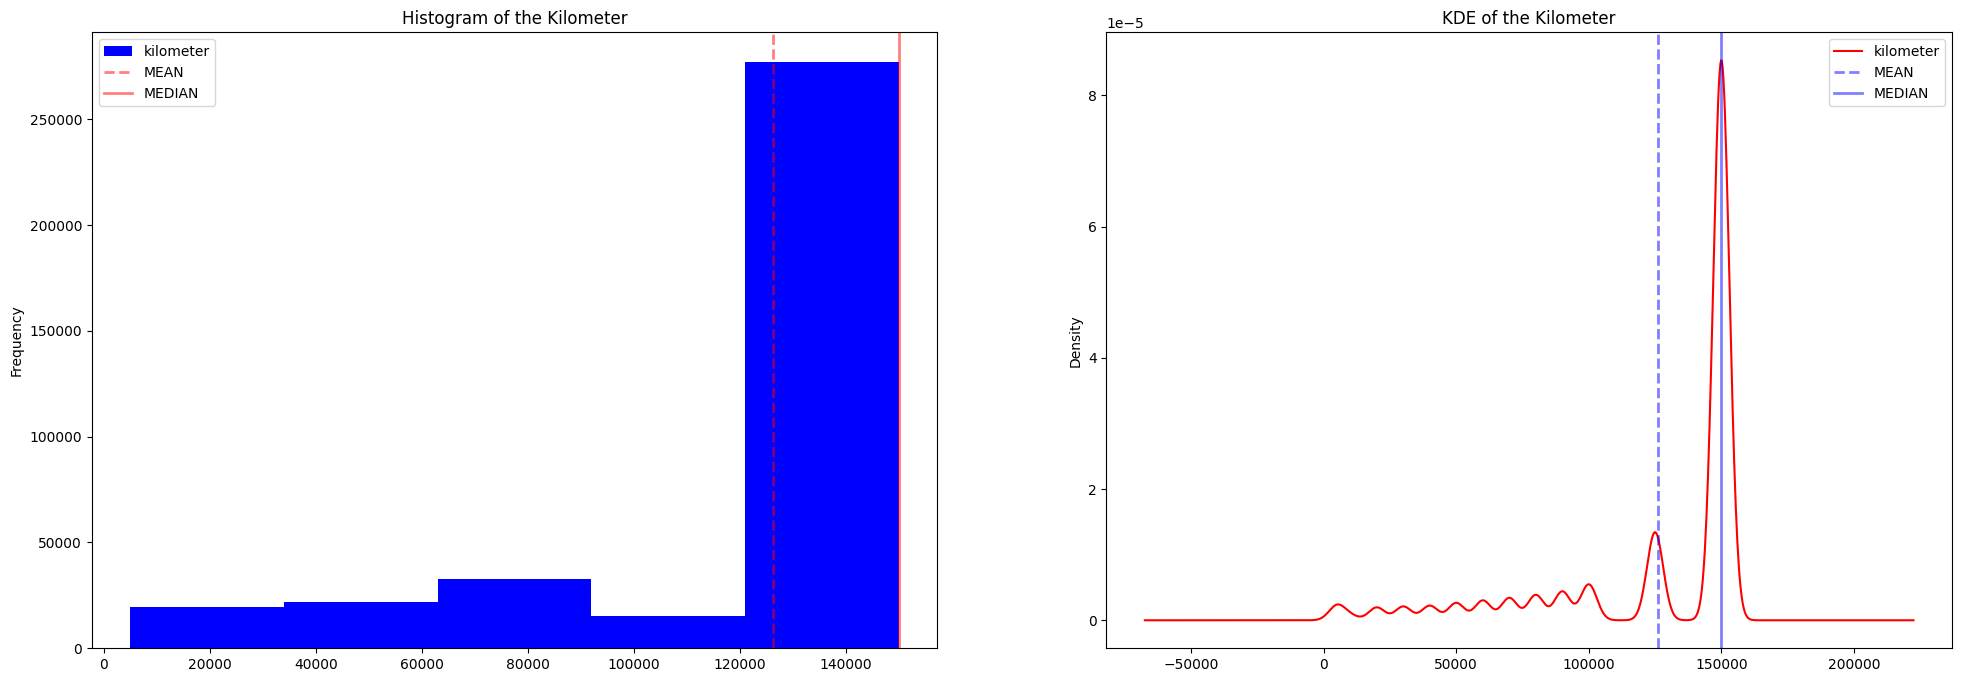

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Convert 'kilometer' to numeric
df1['kilometer'] = pd.to_numeric(df1['kilometer'], errors='coerce')

km_mean = df1['kilometer'].mean()
km_median = df1['kilometer'].median()

df1['kilometer'].plot(kind='hist', bins=5, ax=axes[0], title='Histogram of the Kilometer', xlabel='KM', color='blue')
axes[0].axvline(km_mean, color='red', linestyle='dashed', linewidth=2, label='MEAN', alpha=0.5)
axes[0].axvline(km_median, color='red', linestyle='solid', linewidth=2, label='MEDIAN', alpha=0.5)
axes[0].legend()

df1['kilometer'].plot(kind='kde', ax=axes[1], title='KDE of the Kilometer', xlabel='KM', color='red')
axes[1].axvline(km_mean, color='blue', linestyle='dashed', linewidth=2, label='MEAN', alpha=0.5)
axes[1].axvline(km_median, color='blue', linestyle='solid', linewidth=2, label='MEDIAN', alpha=0.5)
axes[1].legend()

print(f"Min. of Kilometer: {df1['kilometer'].min()} -- Max. of Kilometer: {df1['kilometer'].max()}\n")


In [80]:
df1.isna().sum()/len(df1)*100

name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType            10.077864
yearOfRegistration      0.000000
gearbox                 0.000000
powerPS                 0.000000
model                   5.246206
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                8.777767
brand                   0.000000
notRepairedDamage       0.000000
dateCreated             0.000000
postalCode              0.000000
dtype: float64

In [81]:
# استبدل 'df1' بالاسم الفعلي للDataFrame الخاص بك
# على سبيل المثال: df1 = pd.read_csv('your_data.csv')

# قم بملء القيم النالية بالقيمة الأكثر تكرارًا في كل عمود
columns_to_fill = ['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage']

for column in columns_to_fill:
    df1[column].fillna(df1[column].mode()[0], inplace=True)

# عرض البيانات بعد ملء القيم النالية
print(df1)


                                                name  seller offerType  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
1                               A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
...                                              ...     ...       ...    ...   
371534                    Suche_t4___vito_ab_6_sitze  privat   Angebot   2200   
371535         Smart_smart_leistungssteigerung_100ps  privat   Angebot   1199   
371536            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   Angebot   9200   
371537                        VW_Golf_Kombi_1_9l_TDI  privat   Angebot   3400   
371538  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat   Angebot  28990   

         abtest vehicleType

In [82]:
df1.isna().sum()


name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
dtype: int64

In [83]:
import pandas as pd

# Assuming df2 is your DataFrame
# Convert the "price" column to numeric, ignoring errors for non-numeric values
df1['powerPS'] = pd.to_numeric(df1['powerPS'], errors='coerce')

# Calculate the mean excluding NaN and zeros
mean_powerPS = df1.loc[(df1['powerPS'].notna()) & (df1['powerPS'] != 0), 'powerPS'].mean()

# Replace zeros with the calculated mean
df1['powerPS'] = df1['powerPS'].replace(0, mean_powerPS)

# Print the DataFrame after the modification
print(df1)


                                                name  seller offerType  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
1                               A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
...                                              ...     ...       ...    ...   
371534                    Suche_t4___vito_ab_6_sitze  privat   Angebot   2200   
371535         Smart_smart_leistungssteigerung_100ps  privat   Angebot   1199   
371536            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   Angebot   9200   
371537                        VW_Golf_Kombi_1_9l_TDI  privat   Angebot   3400   
371538  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat   Angebot  28990   

         abtest vehicleType

In [84]:
len(df1[df1['powerPS']==0])

0

In [85]:
df1["gearbox"].unique()

array(['Manual', 'Automatic'], dtype=object)

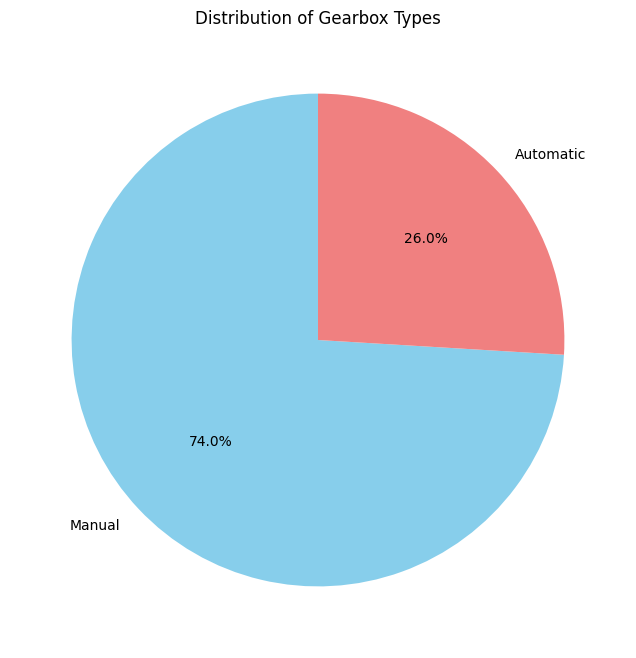

In [86]:
import matplotlib.pyplot as plt

# حساب نسب القيم في الكولوم "gearbox"
gearbox_counts = df1["gearbox"].value_counts()

# رسم دائري لعرض نسب القيم
plt.figure(figsize=(8, 8))
plt.pie(gearbox_counts, labels=gearbox_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gearbox Types')
plt.show()


<AxesSubplot: xlabel='gearbox', ylabel='count'>

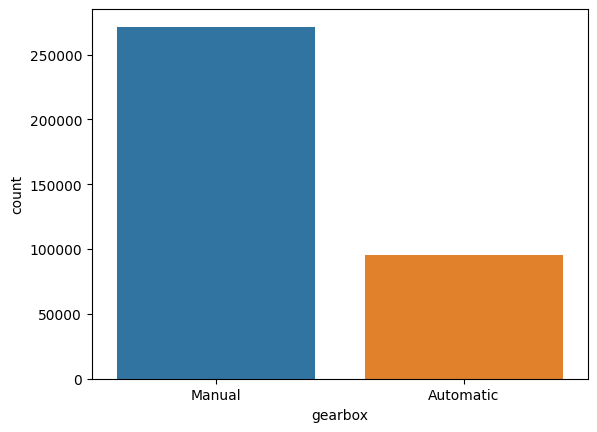

In [87]:
sns.countplot(data=df1, x="gearbox")

In [88]:
seller_counts = df1["seller"].value_counts()
print(seller_counts)


privat        366663
gewerblich         2
Name: seller, dtype: int64


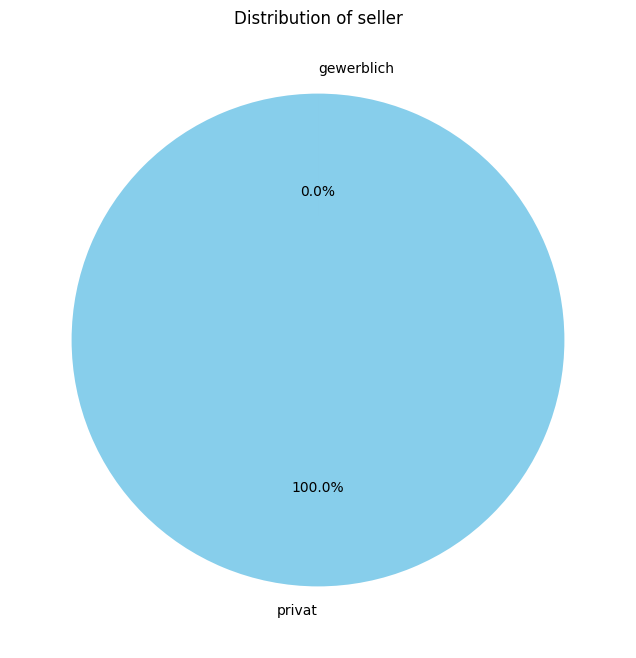

In [89]:
import matplotlib.pyplot as plt

# حساب نسب القيم في الكولوم "gearbox"
gearbox_counts = df1["seller"].value_counts()

# رسم دائري لعرض نسب القيم
plt.figure(figsize=(8, 8))
plt.pie(gearbox_counts, labels=gearbox_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of seller')
plt.show()


In [90]:
import pandas as pd

# استبدل 'df1' بالاسم الفعلي للDataFrame الخاص بك
# على سبيل المثال: df1 = pd.read_csv('your_data.csv')

# القيم المرغوب فيها
allowed_values = ['privat']

# اختيار الصفوف التي تحتوي على القيم المرغوب فيها
df1 = df1[df1['seller'].isin(allowed_values)]

# عرض DataFrame بعد التنظيف
print(df1)


                                                name  seller offerType  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
1                               A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
...                                              ...     ...       ...    ...   
371534                    Suche_t4___vito_ab_6_sitze  privat   Angebot   2200   
371535         Smart_smart_leistungssteigerung_100ps  privat   Angebot   1199   
371536            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   Angebot   9200   
371537                        VW_Golf_Kombi_1_9l_TDI  privat   Angebot   3400   
371538  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat   Angebot  28990   

         abtest vehicleType

In [91]:
df1["seller"].unique()

array(['privat'], dtype=object)

<AxesSubplot: title={'center': 'KDE of the month of registration'}, ylabel='Density'>

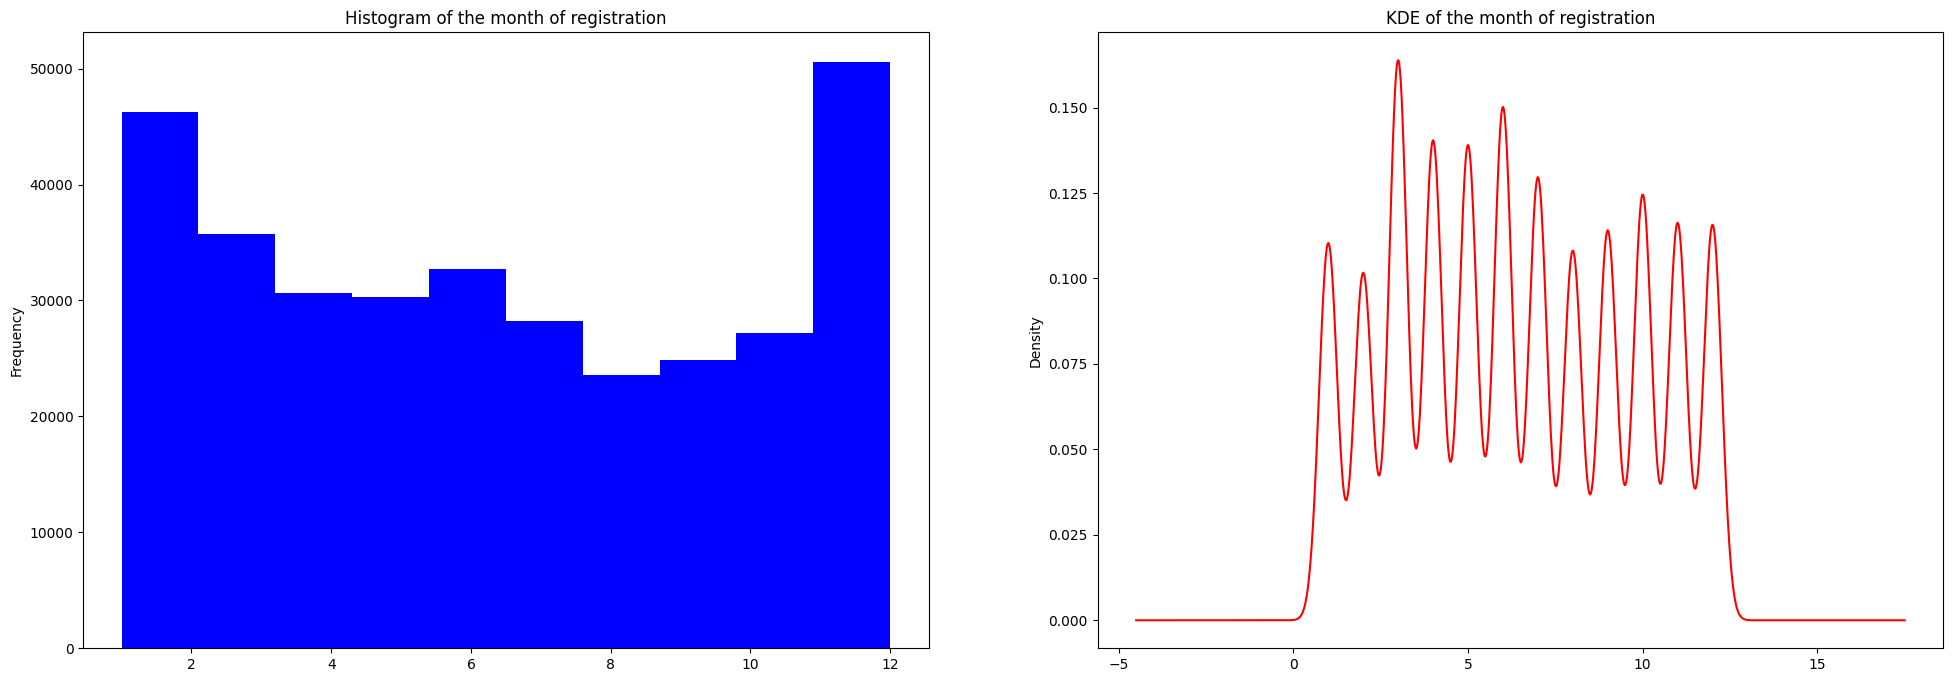

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Convert 'monthOfRegistration' to numeric, coerce non-numeric values to NaN
df1['monthOfRegistration'] = pd.to_numeric(df1['monthOfRegistration'], errors='coerce')

# Filter months with valid values (greater than 0)
months = df1[df1['monthOfRegistration'] > 0]

# Plot histogram
months['monthOfRegistration'].plot(kind='hist', ax=axes[0], title='Histogram of the month of registration', xlabel='Month', color='blue')

# Plot KDE
months['monthOfRegistration'].plot(kind='kde', ax=axes[1], title='KDE of the month of registration', xlabel='Month', color='red')


<AxesSubplot: xlabel='seller', ylabel='count'>

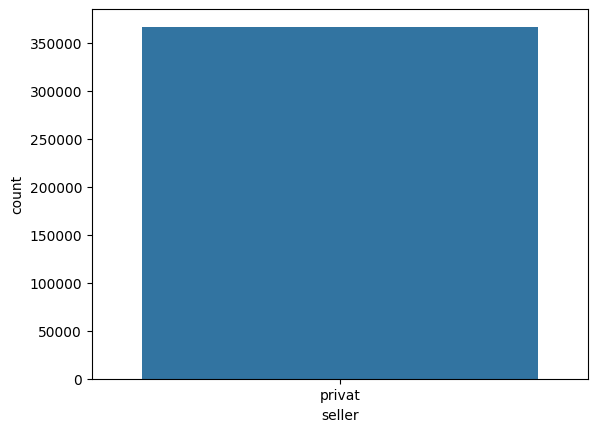

In [93]:
sns.countplot(data=df1, x="seller")

In [94]:
df1["offerType"].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [95]:
offerType_counts = df1["offerType"].value_counts()
print(offerType_counts)


Angebot    366652
Gesuch         11
Name: offerType, dtype: int64


In [96]:
import pandas as pd

# استبدل 'df1' بالاسم الفعلي للDataFrame الخاص بك
# على سبيل المثال: df1 = pd.read_csv('your_data.csv')

# القيم المرغوب فيها
allowed_values = ['Angebot']

# اختيار الصفوف التي تحتوي على القيم المرغوب فيها
df1 = df1[df1['offerType'].isin(allowed_values)]

# عرض DataFrame بعد التنظيف
print(df1)


                                                name  seller offerType  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
1                               A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
...                                              ...     ...       ...    ...   
371534                    Suche_t4___vito_ab_6_sitze  privat   Angebot   2200   
371535         Smart_smart_leistungssteigerung_100ps  privat   Angebot   1199   
371536            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   Angebot   9200   
371537                        VW_Golf_Kombi_1_9l_TDI  privat   Angebot   3400   
371538  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat   Angebot  28990   

         abtest vehicleType

<AxesSubplot: xlabel='offerType', ylabel='count'>

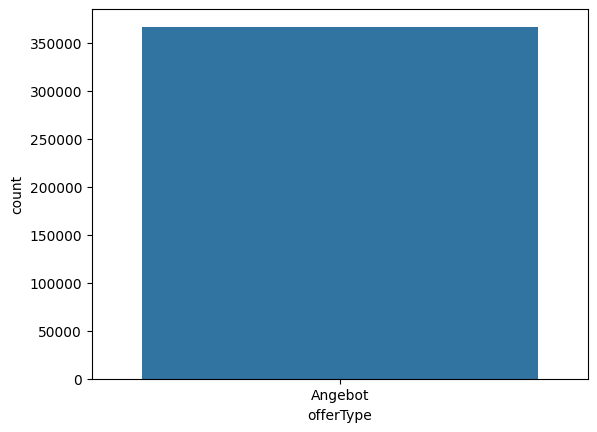

In [97]:
sns.countplot(data=df1, x="offerType")

In [98]:
df1["vehicleType"].unique()

array(['limousine', 'coupe', 'suv', 'kleinwagen', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

<AxesSubplot: xlabel='vehicleType', ylabel='count'>

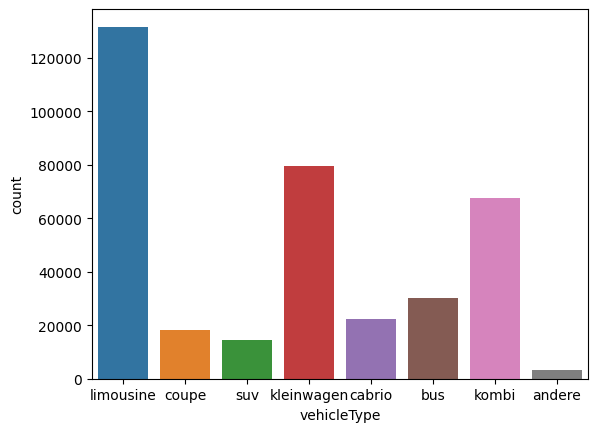

In [99]:
sns.countplot(data=df1, x="vehicleType")

In [100]:
df1["fuelType"].unique()

array(['Petrol', 'diesel', 'lpg', 'Other', 'hybrid', 'cng', 'elektro'],
      dtype=object)

<AxesSubplot: xlabel='fuelType', ylabel='count'>

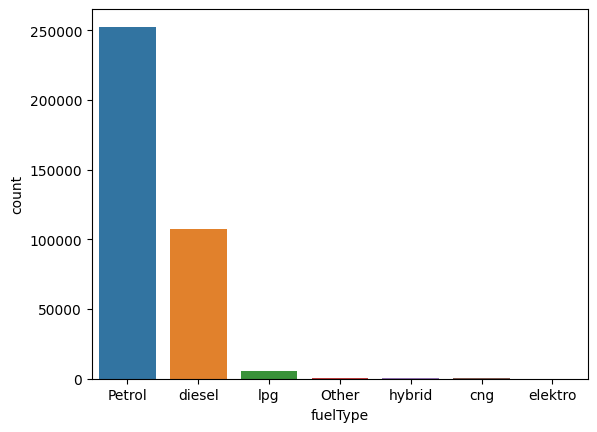

In [101]:
sns.countplot(data=df1, x="fuelType")

name                           object
seller                         object
offerType                      object
price                          object
abtest                         object
vehicleType                    object
yearOfRegistration            float64
gearbox                        object
powerPS                       float64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                     object
dtype: object
object


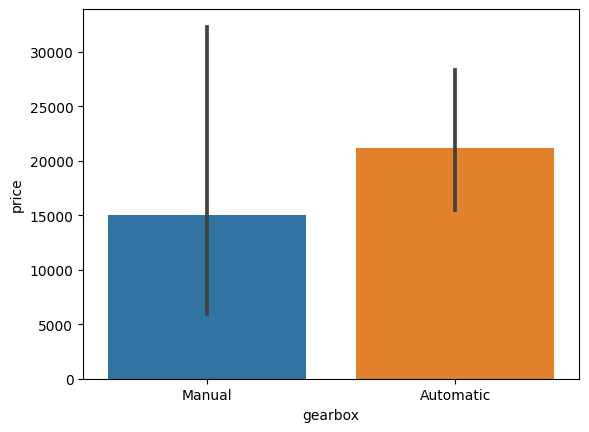

In [102]:
# عرض أنواع البيانات في DataFrame
print(df1.dtypes)

# تحقق من نوع البيانات في عمود "price"
print(df1["price"].dtype)

# تحويل عمود "price" إلى نوع رقمي إذا لزم الأمر
df1["price"] = pd.to_numeric(df1["price"], errors="coerce")

# الآن حاول استخدام sns.barplot مرة أخرى
sns.barplot(data=df1, x="gearbox", y="price")
plt.show()


In [103]:
df1["notRepairedDamage"].unique()

array(['NaN', 'Yes', 'No'], dtype=object)

In [104]:
import pandas as pd

# استبدل 'df1' بالاسم الفعلي للDataFrame الخاص بك
# على سبيل المثال: df1 = pd.read_csv('your_data.csv')

# القيم المرغوب فيها
allowed_values = ['Yes', 'No']

# اختيار الصفوف التي تحتوي على القيم المرغوب فيها
df1 = df1[df1['notRepairedDamage'].isin(allowed_values)]

# عرض DataFrame بعد التنظيف
print(df1)


                                                     name  seller offerType  \
1                                    A5_Sportback_2.7_Tdi  privat   Angebot   
3                                      GOLF_4_1_4__3TÜRER  privat   Angebot   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat   Angebot   
6                             Peugeot_206_CC_110_Platinum  privat   Angebot   
...                                                   ...     ...       ...   
371532                 Opel_Zafira_1.6_Elegance_TÜV_12/16  privat   Angebot   
371533                                    Mitsubishi_Cold  privat   Angebot   
371535              Smart_smart_leistungssteigerung_100ps  privat   Angebot   
371536                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   Angebot   
371538       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat   Angebot   

        price   abtest vehicleType  yearOfRegistrat

In [105]:
df1["notRepairedDamage"].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot: xlabel='notRepairedDamage', ylabel='count'>

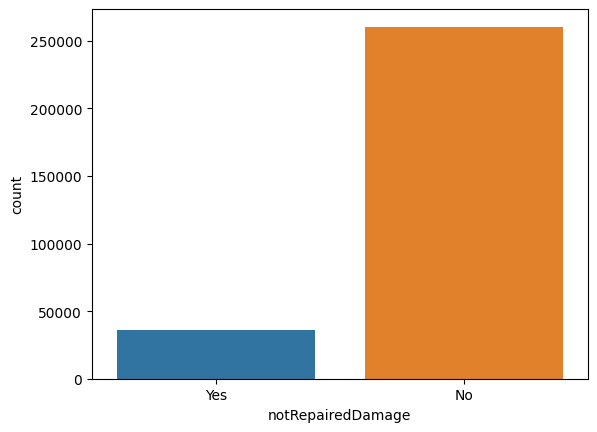

In [106]:
sns.countplot(data=df1, x="notRepairedDamage")

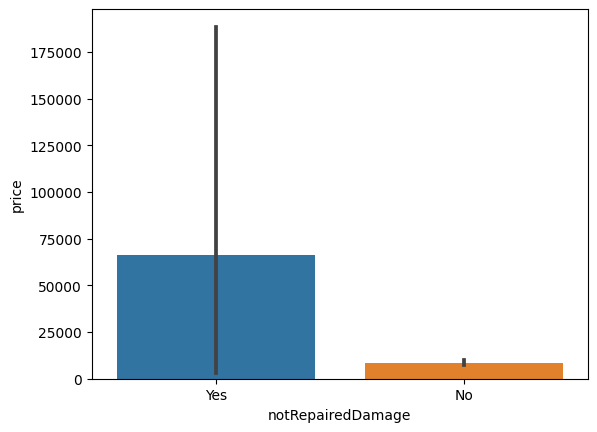

In [107]:
sns.barplot(data=df1, x="notRepairedDamage", y="price")
plt.show()

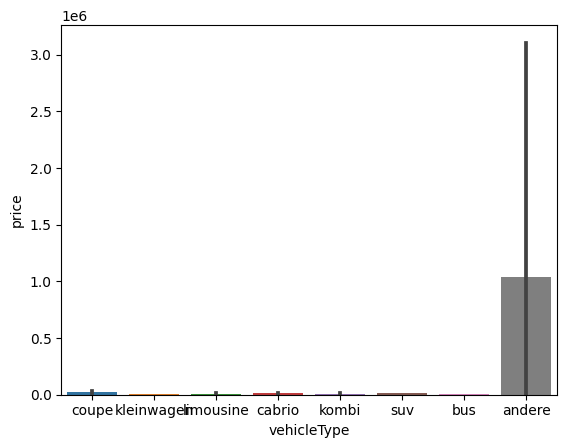

In [108]:
sns.barplot(data=df1, x="vehicleType", y="price")
plt.show()

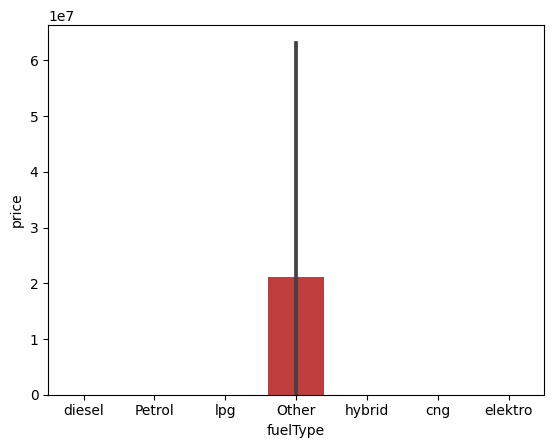

In [109]:
sns.barplot(data=df1, x="fuelType", y="price")
plt.show()

# There's no correlation between Price and Month of registration, so I'm gonna drop it later.

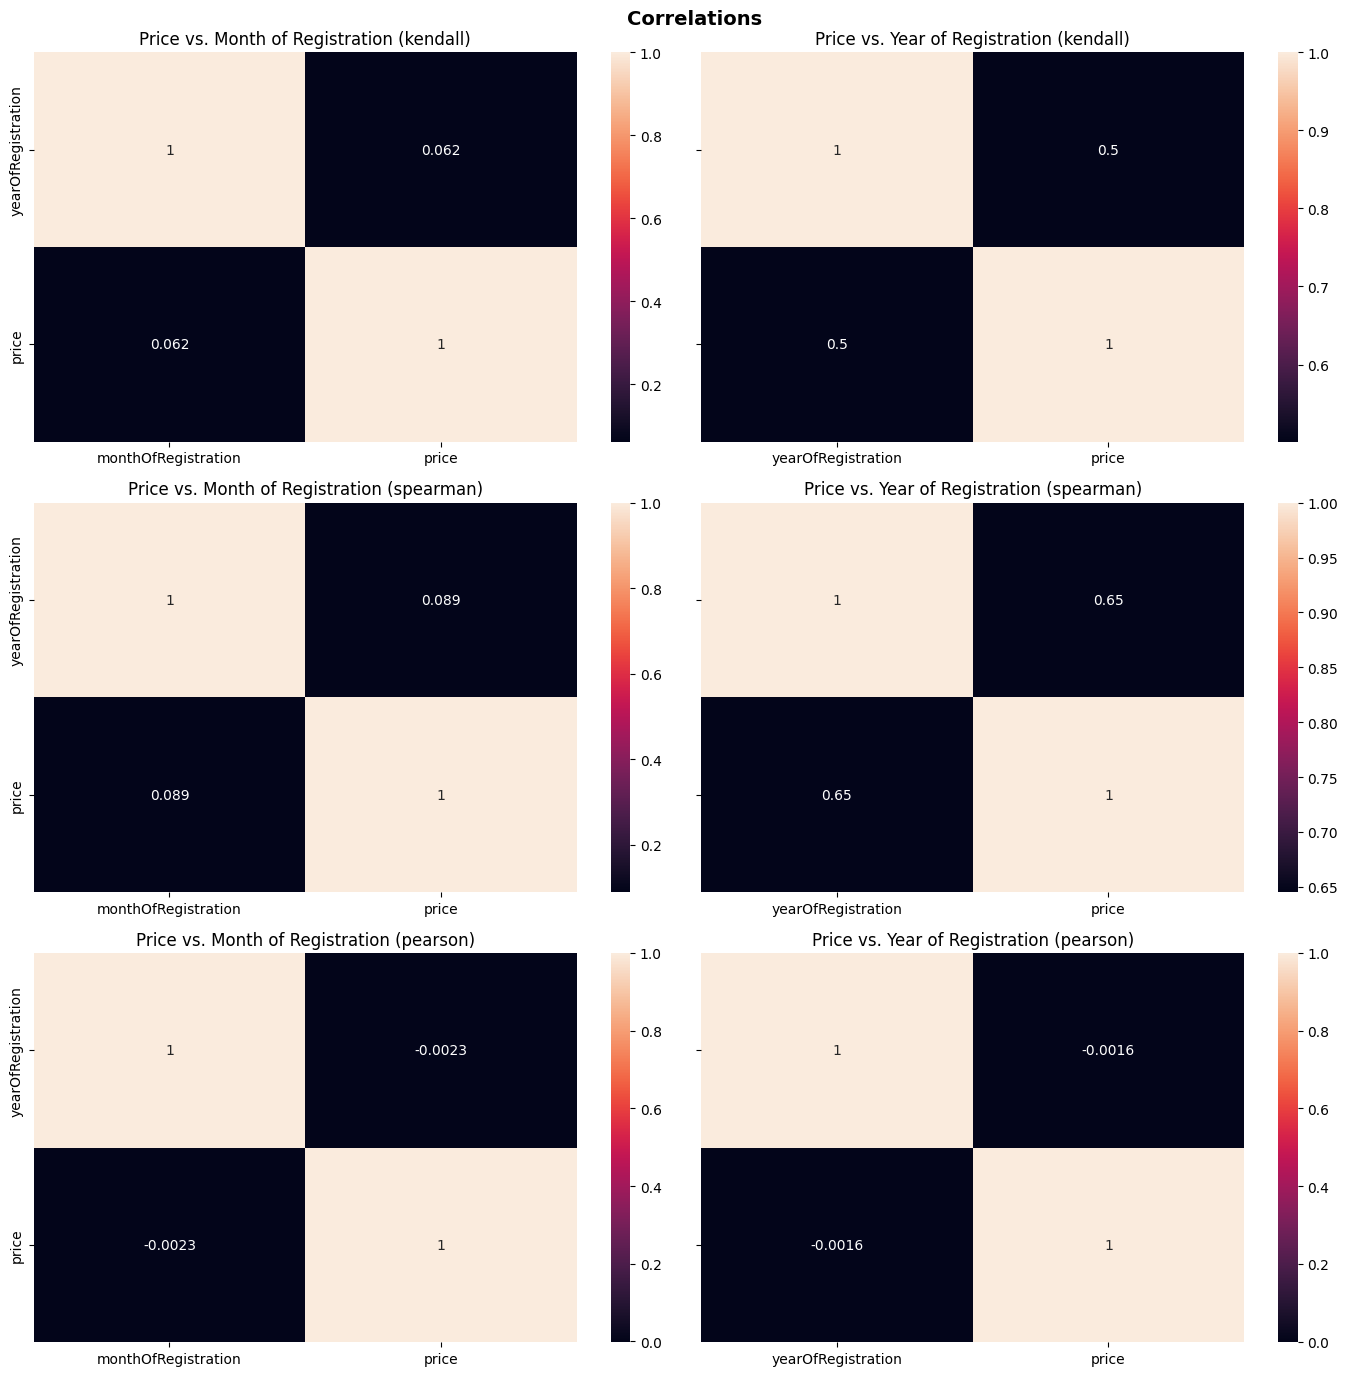

In [110]:
a = df1[['monthOfRegistration', 'price']]
b = df1[['yearOfRegistration', 'price']]
methods = ['kendall', 'spearman', 'pearson']

fig, axes = plt.subplots(3, 2, figsize=(14, 14), sharey=True)
fig.suptitle('Correlations', fontweight='bold', fontsize='14')

for i in range(3):

    sns.heatmap(a.corr(method=methods[i]), annot=True, ax=axes[i,0])
    axes[i,0].set_title(f"Price vs. Month of Registration ({methods[i]})")

    sns.heatmap(b.corr(method=methods[i]), annot=True, ax=axes[i,1])
    axes[i,1].set_title(f"Price vs. Year of Registration ({methods[i]})")

plt.tight_layout()
plt.show()


###  الكود الذي قدمته يقوم بتحليل توزيع أسعار السيارات في مجموعة البيانات. وفيما يلي شرح بسيط لكل جزء من الكود:

### 1.يتم حساب وطباعة إحصائيات حول أسعار السيارات. تم تحديد حدود محددة للأسعار (20,000، 30,000، 40,000) ويتم عد السيارات التي تمتلك أسعارًا أعلى من تلك الحدود.

### 2. يتم حساب وطباعة متوسط الأسعار والوسيط وأدنى وأعلى قيمة. يتم استخدام الدالة `mean()` لحساب المتوسط، و `median()` لحساب الوسيط، و `min()` و `max()` للحصول على القيمة الأدنى والأعلى.

### بالتالي، يقدم الكود معلومات حول عدد السيارات ذات الأسعار التي تتجاوز مستويات محددة، بالإضافة إلى إحصائيات مهمة حول توزيع أسعار السيارات في مجموعة البيانات.

In [111]:
from colorama import Style
# Calculate and print statistics about car prices
price_thresholds = [20_000, 30_000, 40_000]

# Count the number of cars with prices higher than each threshold
for threshold in price_thresholds:
    count_above_threshold = len(df1[df1['price'] > threshold])
    print(f"No. of cars with a price value higher than {threshold}K: {Style.BRIGHT}{count_above_threshold}")

# Calculate and print mean, median, min, and max prices
mean_price = df1['price'].mean()
median_price = df1['price'].median()
min_price = df1['price'].min()
max_price = df1['price'].max()

print(f"{Style.RESET_ALL}Mean of price: {Style.BRIGHT}{mean_price:.2f}{Style.RESET_ALL}, Median of price: {Style.BRIGHT}{median_price}")
print(f"{Style.RESET_ALL}Min. price: {Style.BRIGHT}{min_price}{Style.RESET_ALL}, Max. price: {Style.BRIGHT}{max_price}")


No. of cars with a price value higher than 20000K: 15632
No. of cars with a price value higher than 30000K: 5285
No. of cars with a price value higher than 40000K: 2363
Mean of price: 15488.97, Median of price: 3499.0
Min. price: 0, Max. price: 2147483647


In [112]:
df1.head()


,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011.0,Manual,190.0,golf,125000,5,diesel,audi,Yes,2016-03-24,66954
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001.0,Manual,75.0,golf,150000,6,Petrol,volkswagen,No,2016-03-17,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008.0,Manual,69.0,fabia,90000,7,diesel,skoda,No,2016-03-31,60437
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995.0,Manual,102.0,3er,150000,10,Petrol,bmw,Yes,2016-04-04,33775
6,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004.0,Manual,109.0,2_reihe,150000,8,Petrol,peugeot,No,2016-04-01,67112


In [113]:
current_year = 2023
df1['age'] = current_year - df1['yearOfRegistration']

In [114]:
df1.isna().sum()/len(df1)*100

name                   0.0
seller                 0.0
offerType              0.0
price                  0.0
abtest                 0.0
vehicleType            0.0
yearOfRegistration     0.0
gearbox                0.0
powerPS                0.0
model                  0.0
kilometer              0.0
monthOfRegistration    0.0
fuelType               0.0
brand                  0.0
notRepairedDamage      0.0
dateCreated            0.0
postalCode             0.0
age                    0.0
dtype: float64

In [115]:
# Drop cars with unacceptable prices
df1 = df1[df1['price'].between(200, 20_000)]


In [116]:
# Drop cars with extreme powerPS
df1 = df1[(df1['powerPS'] > 0) & (df1['powerPS'] <= 1000)]

In [117]:
# Drop unnecessary columns and rows
df1.drop(['postalCode', 'dateCreated', 'name', 'monthOfRegistration', 'yearOfRegistration','seller','offerType'], axis=1, inplace=True)
df1 = df1[df1['fuelType'] != 'Other']

# Building Modeling

In [118]:
# Categorical to Numerical
categorical_features = ['vehicleType', 'fuelType', 'brand', 'model', 'abtest', 'notRepairedDamage', 'gearbox']
le = LabelEncoder()

for categorical_feature in categorical_features:
    df1[categorical_feature] = le.fit_transform(df1[categorical_feature])

In [119]:
df1.head()

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
1,18300,1,3,1,190.0,117,125000,2,1,1,12.0
3,1500,1,4,1,75.0,117,150000,0,38,0,22.0
4,3600,1,4,1,69.0,102,90000,2,31,0,15.0
5,650,1,6,1,102.0,11,150000,0,2,1,28.0
6,2200,1,2,1,109.0,8,150000,0,25,0,19.0


In [120]:
x = df1.drop(['price'], axis=1)
y = df1['price']

scaler = StandardScaler()
numerical_features = ['kilometer', 'powerPS', 'age']
x[numerical_features] = scaler.fit_transform(x[numerical_features])

In [121]:
x.head()

,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
1,1,3,1,1.273432,117,-0.076893,2,1,1,-1.188473
3,1,4,1,-0.908732,117,0.601083,0,38,0,0.438372
4,1,4,1,-1.022585,102,-1.026059,2,31,0,-0.700419
5,1,6,1,-0.396398,11,0.601083,0,2,1,1.414479
6,1,2,1,-0.263571,8,0.601083,0,25,0,-0.049681


### SPLITING DATA

In [122]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=15)
print(f"Train Shape: {X_train.shape}\nTest Shape: {X_test.shape}")

Train Shape: (217412, 10)
Test Shape: (54353, 10)


In [123]:
y_test[:5]

51581     8500
127201    3400
73780     1190
15891     3350
214980     999
Name: price, dtype: int64

##### DECISION TREE

In [135]:
# Create a Decision Tree Regressor
base_model = DecisionTreeRegressor()
base_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [136]:
y_pred = base_model.predict(X_test)
y_pred[:5]

array([ 366.66666667,  300.        , 1854.33333333, 9838.        ,
        850.        ])

In [137]:
base_model.score(X_train, y_train)

0.9702441384740319

In [138]:
from sklearn.metrics import r2_score
# Calculate R²
r2_value = r2_score(y_test, y_pred)

print(f'R² Score: {r2_value:.4f}')

R² Score: 0.8177


#### TUNING DT

In [383]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning using Grid Search for Decision Tree Regressor
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Model Evaluation
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Cross-validation to assess model stability
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Print the "EVALUATION METRICS"
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Absolute Error: 1085.05
Mean Squared Error: 3150646.55


In [67]:
best_model.score(X_train, y_train)

0.9184725233502815

In [68]:
from sklearn.metrics import r2_score
# Calculate R²
r2_value = r2_score(y_test, y_pred)

print(f'R² Score: {r2_value:.4f}')

R² Score: 0.8531


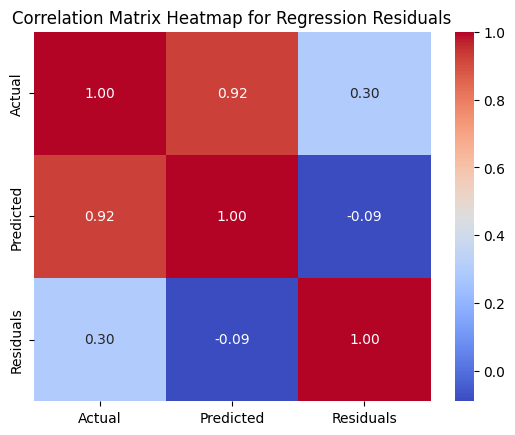

In [69]:
# Calculate residuals (differences between actual and predicted values)
residuals = y_test - y_pred

# Create a DataFrame for visualization
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Create a heatmap for residuals
sns.heatmap(df_res.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title('Correlation Matrix Heatmap for Regression Residuals')
plt.show()

#### RandomForestRegressor

In [70]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')  # it can be raw_values
print('Mean Absolute Error Value is:', MAEValue)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')  # it can be raw_values
print('Mean Squared Error Value is:', MSEValue)

print(f'R² Score: {r2:.4f}')


Mean Absolute Error Value is: 993.7698166178762
Mean Squared Error Value is: 2609401.951109789
R² Score: 0.8781


In [71]:
rf_model.score(X_train, y_train)


0.9599284952854816

#### TUNING RF

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter distributions
param_distributions = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='r2',
    cv=5
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
r2_tuned = r2_score(y_test, y_pred_tuned)
MAEValue_tuned = mean_absolute_error(y_test, y_pred_tuned, multioutput='uniform_average')
MSEValue_tuned = mean_squared_error(y_test, y_pred_tuned, multioutput='uniform_average')

# Print the results
print('Best Hyperparameters:', best_params)
print('Tuned R² Score:', r2_tuned)
print('Tuned Mean Absolute Error:', MAEValue_tuned)
print('Tuned Mean Squared Error:', MSEValue_tuned)



Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': 20}
Tuned R² Score: 0.8831868320225303
Tuned Mean Absolute Error: 983.5222394250638
Tuned Mean Squared Error: 2500299.9374882937


In [73]:
best_rf_model.score(X_train, y_train)


0.9329106840598287

#### ExtraTreesRegressor

In [74]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create an Extra Trees Regressor model
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
et_model.fit(X_train, y_train)

# Predict on the test set
y_pred_et = et_model.predict(X_test)

# Evaluate the model
r2_et = r2_score(y_test, y_pred_et)
MAE_et = mean_absolute_error(y_test, y_pred_et, multioutput='uniform_average')  # it can be raw_values
MSE_et = mean_squared_error(y_test, y_pred_et, multioutput='uniform_average')  # it can be raw_values

# Print the evaluation metrics
print('Extra Trees R² Score:', r2_et)
print('Extra Trees Mean Absolute Error:', MAE_et)
print('Extra Trees Mean Squared Error:', MSE_et)


Extra Trees R² Score: 0.8715667446964463
Extra Trees Mean Absolute Error: 1015.4747872295079
Extra Trees Mean Squared Error: 2749019.3594341143


In [75]:
et_model.score(X_train, y_train)

0.9702440970270019

#### TUNING ExtraTreesRegressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
# Define the parameter grid for tuning
param_grid_et = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an Extra Trees Regressor model
et_model = ExtraTreesRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search_et = GridSearchCV(et_model, param_grid_et, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search_et.fit(X_train, y_train)

# Get the best hyperparameters
best_params_et = grid_search_et.best_params_

# Train the model with the best hyperparameters
best_et_model = ExtraTreesRegressor(**best_params_et, random_state=42)
best_et_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_et = best_et_model.predict(X_test)

# Evaluate the model
r2_best_et = r2_score(y_test, y_pred_best_et)
MAE_best_et = mean_absolute_error(y_test, y_pred_best_et, multioutput='uniform_average')
MSE_best_et = mean_squared_error(y_test, y_pred_best_et, multioutput='uniform_average')

# Print the best hyperparameters and evaluation metrics
print('Best Extra Trees Hyperparameters:', best_params_et)
print('Best Extra Trees R² Score:', r2_best_et)
print('Best Extra Trees Mean Absolute Error:', MAE_best_et)
print('Best Extra Trees Mean Squared Error:', MSE_best_et)


In [ ]:
best_et_model.score(X_train, y_train)

#### KNeighborsRegressor & XGBRegressor & CatBoostRegressor

In [507]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

# Define models
models = {
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(silent=True),
}

# Create pipelines
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('scaler', StandardScaler()),  # Include standard scaler in the pipeline
        ('model', model),
    ])

# Define hyperparameter grids
param_grids = {
    'KNN': {'model__n_neighbors': [3, 5, 7, 9]},
    'XGBoost': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'model__iterations': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2]},
}

# Define scoring metrics for GridSearchCV and cross-validation
scoring_metric_mse = make_scorer(mean_squared_error, greater_is_better=False)
scoring_metric_r2 = make_scorer(r2_score)

# Hyperparameter tuning using GridSearchCV
results = {}
for name, pipeline in pipelines.items():
    param_grid = param_grids[name]

    # GridSearchCV for Mean Squared Error
    grid_search_mse = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring_metric_mse, n_jobs=-1)
    grid_search_mse.fit(X_train, y_train)

    # GridSearchCV for R2 score
    grid_search_r2 = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring_metric_r2, n_jobs=-1)
    grid_search_r2.fit(X_train, y_train)

    results[name] = {
        'Best Hyperparameters': grid_search_mse.best_params_,
        'Best Mean Squared Error': -grid_search_mse.best_score_,
        'Best R2 Score': grid_search_r2.best_score_,
    }
# Display results
for name, result in results.items():
    print(f"\nModel: {name}")
    print(f"Best Hyperparameters: {result['Best Hyperparameters']}")
    print(f"Best Mean Squared Error: {result['Best Mean Squared Error']}")
    print(f"Best R2 Score: {result['Best R2 Score']}")
    print("---------------------------")


# Evaluate accuracy for each model using cross-validation
for name, pipeline in pipelines.items():
    # Cross-validation for Mean Squared Error
    scores_mse = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = -scores_mse.mean()

    # Cross-validation for R2 score
    scores_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    mean_r2 = scores_r2.mean()

    print(f"\nModel: {name}")
    print(f"Mean Squared Error (Cross-Validation): {mean_mse}")
    print(f"R2 Score (Cross-Validation): {mean_r2}")
    print("---------------------------")


Model: KNN
Best Hyperparameters: {'model__n_neighbors': 7}
Best Mean Squared Error: 3584584.184715595
Best R2 Score: 0.8328568110023136
---------------------------

Model: XGBoost
Best Hyperparameters: {'model__learning_rate': 0.2, 'model__n_estimators': 200}
Best Mean Squared Error: 2541033.694569408
Best R2 Score: 0.8815145847727465
---------------------------

Model: CatBoost
Best Hyperparameters: {'model__iterations': 200, 'model__learning_rate': 0.2}
Best Mean Squared Error: 2822828.9023367288
Best R2 Score: 0.8683752012604179
---------------------------

Model: KNN
Mean Squared Error (Cross-Validation): 3600963.432071979
R2 Score (Cross-Validation): 0.8320938490920108
---------------------------

Model: XGBoost
Mean Squared Error (Cross-Validation): 2624483.1243819827
R2 Score (Cross-Validation): 0.8776237980632979
---------------------------

Model: CatBoost
Mean Squared Error (Cross-Validation): 2606095.4562367266
R2 Score (Cross-Validation): 0.8784822785216463
---------------

In [509]:
from pycaret.regression import *
exp1 = setup(df1, target='price', session_id=123)

# Compare regression models
best_model = compare_models()

# Create a model using the best performing algorithm
final_model = create_model(best_model)

# Evaluate the model
evaluate_model(final_model)


,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(271765, 11)"
4,Transformed data shape,"(271765, 11)"
5,Transformed train set shape,"(190235, 11)"
6,Transformed test set shape,"(81530, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1032.3439,2617247.5305,1617.7019,0.8780,0.4435,0.3872,5.8050
xgboost,Extreme Gradient Boosting,1036.4672,2639577.2289,1624.5711,0.8770,0.4435,0.3861,0.3360
rf,Random Forest Regressor,1015.1247,2685100.0222,1638.5600,0.8748,0.4287,0.3785,5.8530
et,Extra Trees Regressor,1038.4506,2835003.6334,1683.6214,0.8679,0.4430,0.3865,6.4830
lightgbm,Light Gradient Boosting Machine,1102.1401,2914726.5429,1707.1712,0.8641,0.4498,0.4146,0.3170
gbr,Gradient Boosting Regressor,1278.6758,3736905.7874,1933.0357,0.8258,0.5467,0.4844,2.3480
knn,K Neighbors Regressor,1228.5725,4021252.8544,2005.2012,0.8126,0.4947,0.4756,0.2270
dt,Decision Tree Regressor,1177.1590,4026284.3037,2006.2873,0.8124,0.5053,0.4157,0.1220
ridge,Ridge Regression,2151.0519,8760294.4716,2959.7157,0.5916,0.8543,1.0427,0.0460
lr,Linear Regression,2151.0536,8760294.4831,2959.7157,0.5916,0.8543,1.0427,0.6910


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1041.6511,2697867.6271,1642.5187,0.8769,0.4380,0.3833
1,1047.3140,2731289.1683,1652.6612,0.8751,0.4564,0.4058
2,1021.5380,2578486.7260,1605.7667,0.8789,0.4485,0.3937
3,1035.0373,2617016.9156,1617.7197,0.8757,0.4499,0.3897
4,1036.1655,2612489.2590,1616.3197,0.8781,0.4478,0.3937
5,1021.6090,2548220.6333,1596.3147,0.8797,0.4392,0.3798
6,1020.6888,2553371.2744,1597.9272,0.8839,0.4462,0.3800
7,1036.7894,2609742.9335,1615.4699,0.8758,0.4392,0.3880
8,1028.6373,2597255.7399,1611.6004,0.8782,0.4401,0.3824


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [141]:
# Separate features and target variable
X = df1.drop('price', axis=1)
y = df1['price']
scaler = StandardScaler()

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', scaler, numerical_cols)
    ],
    remainder='passthrough'  # Include the columns not specified in transformers
)

# Create the Extra Trees Regressor model
model = ExtraTreesRegressor()

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
#THE CORRECT ANSWER BECAUSE "pipeline.score" expects the true values for evaluation, not the predictions extracted from the model
score = pipeline.score(X_test, y_test)
score1 = pipeline.score(X_test, y_pred)
print(f'Model Score: {score}')
print(f'Model Score: {score1}')

Model Score: 0.8714157209419803
Model Score: 0.9357900086551317
